#Α. Στοιχεία Ομάδας

### **Ομάδα Α46**

Μαρκουλέσκου Έλενα-Μπιάνκα  (03115126)

Παπασκαρλάτος Αλέξανδρος      (03111097)




In [2]:
!pip install -U pip
!pip install -U scikit-learn
!pip install -U numpy
!pip install -U pandas
!pip install -U scipy
!pip install -U imbalanced-learn
!pip install -U matplotlib

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.1)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.15.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.23.4)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.1.0)
Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.4.3)
    100% |████████████████████████████████| 12.9MB 2.4MB/s 
    100% |████████████████████████████████| 952kB 18.5MB/s 
yellowbrick 0.9 has requirement matplotlib<3.0,>=1.5.1, but you'll have matplotlib 3.0.2 which is incompatible.
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2


#Β. Εισαγωγή Dataset


## Σύντομη περιγραφή
Το παρόν dataset έχει τίτλο [Quality Assessment of Digital Colposcopies](http://archive.ics.uci.edu/ml/datasets/Quality+Assessment+of+Digital+Colposcopies#). 
Πρόκειται για την υποκειμενική εκτίμηση που έκαναν 6 ειδικοί πάνω σε δείγματα ψηφιακών κολποσκοπήσεων και αφορά την ποιότητα αυτών. Τέλος, δίνεται και η ομόφωνη απόφασή τους (**consensus**).

Αρχικά η ποιότητα των κολποσκοπήσεων εκτιμήθηκε σε 4 βαθμίδες  (poor, fair, good, excellent) και από αυτά εξήχηθκαν έπειτα δύο διακριτές κλάσεις (bad, good).

##Δείγματα, χαρακτηριστικά και κλάσεις

To dataset αποτελείται από **287 δείγματα** συνολικά, διαχωρισμένα σε **τρία αρχεία** (Hinselmann, Green, Schiller). Ο **αριθμός των χαρακτηριστικών είναι 62** . Από την περιγραφή του dataset μας δίνεται πως αυτά βρίσκονται στις **62 πρώτες κολώνες** του. Στις **7 τελευταίες κολώνες** δίνεται ξεχωριστά η **εκτίμηση** του καθένα από τους 6 ειδικούς καθώς και το consensus. Συμπεραίνουμε άρα πως το μοντέλο μας θα έπρεπε να κάνει προβλέψεις για 7 targets (experts0,...5, consensus). Παρόλα αυτά, στα πλαίσια του εργαστηρίου θα φτιάξουμε μοντέλο το οποίο θα κάνει προβλέψεις **μόνο για το consensus**, το οποίο βρίσκεται στην τελευταία κολώνα και αποτελείται, όπως αναφέραμε πιο πάνω από **2 κλάσεις, bad, good** (0 και 1 αντίστοιχα).
<br>

Παρακάτω θα εισάγουμε τα 3 αρχεία για να εξάγουμε περισσότερα συμπεράσματα. 

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving green.csv to green.csv
Saving hinselmann.csv to hinselmann.csv
Saving schiller.csv to schiller.csv
User uploaded file "green.csv" with length 105514 bytes
User uploaded file "hinselmann.csv" with length 107507 bytes
User uploaded file "schiller.csv" with length 101675 bytes


In [4]:
!ls


1year.arff  3year.arff	5year.arff  hinselmann.csv  schiller.csv
2year.arff  4year.arff	green.csv   sample_data     tmp


In [0]:
import pandas as pd
import numpy as np

In [6]:
(pd.read_csv("green.csv", header=None)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,os_specularities_area,walls_specularities_area,speculum_specularities_area,specularities_area,area_h_max_diff,rgb_cervix_r_mean,rgb_cervix_r_std,rgb_cervix_r_mean_minus_std,rgb_cervix_r_mean_plus_std,rgb_cervix_g_mean,rgb_cervix_g_std,rgb_cervix_g_mean_minus_std,rgb_cervix_g_mean_plus_std,rgb_cervix_b_mean,rgb_cervix_b_std,rgb_cervix_b_mean_minus_std,rgb_cervix_b_mean_plus_std,rgb_total_r_mean,rgb_total_r_std,rgb_total_r_mean_minus_std,rgb_total_r_mean_plus_std,rgb_total_g_mean,rgb_total_g_std,rgb_total_g_mean_minus_std,rgb_total_g_mean_plus_std,rgb_total_b_mean,rgb_total_b_std,rgb_total_b_mean_minus_std,rgb_total_b_mean_plus_std,hsv_cervix_h_mean,hsv_cervix_h_std,hsv_cervix_s_mean,hsv_cervix_s_std,hsv_cervix_v_mean,hsv_cervix_v_std,hsv_total_h_mean,hsv_total_h_std,hsv_total_s_mean,hsv_total_s_std,hsv_total_v_mean,hsv_total_v_std,fit_cervix_hull_rate,fit_cervix_hull_total,fit_cervix_bbox_rate,fit_cervix_bbox_total,fit_circle_rate,fit_circle_total,fit_ellipse_rate,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
1,0.34464664392400002,0.00307978843967,0.047521707791700001,0.28821558158900001,0.17858494299,0.016563880445300001,0.0,0.043499832888200002,0.010149380358000001,0.00013323752771300001,0.0,0.0,0.085833120831000004,0.024906935736700001,0.26356037565399998,37.594457745900002,15.7850211066,21.809436639200001,53.3794788525,109.918444622,38.735420721099999,71.183023900699993,148.65386534300001,55.029617806200001,22.1603304048,32.869287401299999,77.189948211000001,38.561367310000001,38.1190589148,0.44230839517199999,76.6804262247,95.109754604200006,51.565052215400002,43.544702388799998,146.67480681999999,48.808474358300003,40.765227547599999,8.0432468107799995,89.573701905899995,5.0146275175500001,2.9919438616699998,167.95277999499999,25.813163448699999,109.91944666099999,38.733740507,5.0908006387200002,2.93664998186,159.486915899,38.437293724100002,95.123888739199998,51.583029462200003,0.92306659438600003,0.37337137539199999,0.84445381807099995,0.40812965321299999,0.60339907973100004,0.57117528929299999,0.96299532207399996,0.35789025764100002,85.474311254499995,0.26593312452500001,0.346293520553,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.16532934808899999,0.0,0.048235596648500002,0.50473589293700005,0.50278296002,0.0070123156652999999,0.0,0.097404510920400006,0.97383731709599997,0.0040551182388799999,0.0,0.0,0.054999239233599999,0.028430520180300001,0.0,59.505882135999997,24.3618774268,35.144004709199997,83.867759562800003,122.36607538,44.742406857600002,77.623668522299994,167.108482237,78.058434134799995,30.818728555300002,47.239705579499997,108.87716269000001,54.9324671826,39.447415318899999,15.485051863700001,94.379882501500006,101.680458954,46.028851997499999,55.6516069563,147.70931095099999,63.218930618100003,43.925911883200001,19.293018735,107.144842501,4.9443818879399997,2.9651080245000001,130.26049196,24.143867452399999,122.36664699799999,44.743931739200001,5.0800633497199996,2.8941625628200001,128.251977616,33.000693045200002,101.725518588,46.093510496999997,0.85086059253500002,0.19430838557999999,0.64664467748400001,0.25567263420800002,0.49731536549200001,0.33244367570599997,0.89462493629700002,0.18480297315800001,124.79412873299999,1.0,0.283059065005,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.45701048101500003,0.0016811833471599999,0.242887859003,0.212859459517,0.0,0.0,0.0,0.0,0.0,0.00175571277825,0.0,0.0,0.083055499375300004,0.018591423393399999,0.26979754243300003,39.353850780199998,19.417332039800002,19.9365187404,58.77118282,109.54338601400001,49.7534903329,59.7898

In [7]:
(pd.read_csv("hinselmann.csv", header=None)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,os_specularities_area,walls_specularities_area,speculum_specularities_area,specularities_area,area_h_max_diff,rgb_cervix_r_mean,rgb_cervix_r_std,rgb_cervix_r_mean_minus_std,rgb_cervix_r_mean_plus_std,rgb_cervix_g_mean,rgb_cervix_g_std,rgb_cervix_g_mean_minus_std,rgb_cervix_g_mean_plus_std,rgb_cervix_b_mean,rgb_cervix_b_std,rgb_cervix_b_mean_minus_std,rgb_cervix_b_mean_plus_std,rgb_total_r_mean,rgb_total_r_std,rgb_total_r_mean_minus_std,rgb_total_r_mean_plus_std,rgb_total_g_mean,rgb_total_g_std,rgb_total_g_mean_minus_std,rgb_total_g_mean_plus_std,rgb_total_b_mean,rgb_total_b_std,rgb_total_b_mean_minus_std,rgb_total_b_mean_plus_std,hsv_cervix_h_mean,hsv_cervix_h_std,hsv_cervix_s_mean,hsv_cervix_s_std,hsv_cervix_v_mean,hsv_cervix_v_std,hsv_total_h_mean,hsv_total_h_std,hsv_total_s_mean,hsv_total_s_std,hsv_total_v_mean,hsv_total_v_std,fit_cervix_hull_rate,fit_cervix_hull_total,fit_cervix_bbox_rate,fit_cervix_bbox_total,fit_circle_rate,fit_circle_total,fit_ellipse_rate,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
1,0.33465207987599999,0.0027274720134899998,0.054514793280200001,0.26521354598899999,0.16595531090599999,0.0062665538990200002,0.0,0.034324216119400001,0.0090773099074400003,0.0013813151627000001,0.0042387242452400003,0.0,0.13712037720100001,0.037418568769600001,0.347649995652,136.60196477299999,46.272693181000001,90.329271591799994,182.87465795400001,82.407184099399998,26.533505960700001,55.873678138700001,108.94069005999999,196.65247056000001,63.572919948699997,133.07955061199999,260.22539050900002,110.241465027,56.944859397400002,53.296605630000002,167.18632442500001,76.407073496300001,44.545685535499999,31.861387960799998,120.952759032,136.57977199300001,73.100204893599994,63.479567098899999,209.67997688599999,4.4259734613999999,3.0060954394900001,143.65735056700001,25.751500211700002,196.80262881799999,63.312714341899998,4.2436787519300001,2.7857349037099999,106.671553561,39.278662184700003,139.00113575099999,72.477167508199997,0.89269704876800005,0.37487754702199999,0.81125127869299996,0.41251346982800002,0.58085056797099999,0.57614143521500005,0.94722252379799998,0.35329827096400002,100.911343444,0.25645475298999998,0.40425719991999998,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.44133214193800002,0.00239289926394,0.157184232186,0.204246273108,0.052486419724599997,0.0,0.0,0.31596784515499998,0.0031774228407599999,0.010092958806900001,0.0,0.0,0.097199056330499994,0.027827439263299999,0.27828327729699998,129.52626948400001,59.3369026361,70.189366847700001,188.86317212,73.982133702799999,34.630387928600001,39.351745774199998,108.61252163100001,156.66128853500001,72.376620738400007,84.284667796400001,229.037909273,133.55119452900001,63.423112420599999,70.128082108200005,196.97430694900001,83.515205598600005,45.088412311799999,38.426793286799999,128.60361791,141.22207766,67.361492169200005,73.860585490399998,208.583569829,4.1876824207199999,2.9460254341100001,130.104648424,24.989313293399999,157.55281607200001,71.732135507699994,3.9525997614900001,2.82463090741,108.819320631,30.646155881199999,147.697599309,68.707443448199996,0.97352713430799998,0.453333170063,0.87690871141600002,0.50328173981199997,0.65817966734,0.670534451059,0.96624525574300002,0.45674960814999999,65.515920452700001,0.56675882468500005,0.49179095694899999,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.48632253058000002,0.017873068604400001,0.21171130678,0.24566183913799999,0.039998364892600002,0.0,0.0,0.0031679657517,0.0015631656080300001,0.00366359919331,0.0,0.000954353439438,0.0,0.0024521208855799999,0.078

In [8]:
(pd.read_csv("schiller.csv", header=None)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,os_specularities_area,walls_specularities_area,speculum_specularities_area,specularities_area,area_h_max_diff,rgb_cervix_r_mean,rgb_cervix_r_std,rgb_cervix_r_mean_minus_std,rgb_cervix_r_mean_plus_std,rgb_cervix_g_mean,rgb_cervix_g_std,rgb_cervix_g_mean_minus_std,rgb_cervix_g_mean_plus_std,rgb_cervix_b_mean,rgb_cervix_b_std,rgb_cervix_b_mean_minus_std,rgb_cervix_b_mean_plus_std,rgb_total_r_mean,rgb_total_r_std,rgb_total_r_mean_minus_std,rgb_total_r_mean_plus_std,rgb_total_g_mean,rgb_total_g_std,rgb_total_g_mean_minus_std,rgb_total_g_mean_plus_std,rgb_total_b_mean,rgb_total_b_std,rgb_total_b_mean_minus_std,rgb_total_b_mean_plus_std,hsv_cervix_h_mean,hsv_cervix_h_std,hsv_cervix_s_mean,hsv_cervix_s_std,hsv_cervix_v_mean,hsv_cervix_v_std,hsv_total_h_mean,hsv_total_h_std,hsv_total_s_mean,hsv_total_s_std,hsv_total_v_mean,hsv_total_v_std,fit_cervix_hull_rate,fit_cervix_hull_total,fit_cervix_bbox_rate,fit_cervix_bbox_total,fit_circle_rate,fit_circle_total,fit_ellipse_rate,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
1,0.31789887977100001,0.0089747948552500005,0.142670408926,0.264625303491,0.051382181987200001,0.022907455980500001,0.0,0.00029148295064599999,0.016850305281999999,0.0033511942849800001,0.0,0.0,0.204350736266,0.056411025666099998,0.300466440625,72.560894788400006,19.990110418499999,52.570784369899997,92.551005206900001,56.272374512600003,17.064522756599999,39.207851755900002,73.336897269199994,84.614134506400006,27.884325480499999,56.729809025900003,112.498459987,101.685678512,55.1033100613,46.582368450700002,156.78898857300001,80.899135482000005,50.606872707500003,30.292262774499999,131.506008189,113.311731608,61.0889886593,52.222742948200001,174.400720267,4.1559179824100001,2.6913199964199999,87.297616074700002,27.363927797799999,87.261473000699993,26.895496298800001,4.1128134519000001,2.54292365992,81.272271135400004,32.118904383199997,118.526991698,61.029658228800002,0.94214821693499995,0.33741918103399998,0.83217996129799998,0.38200737166900001,0.61186896917199995,0.51955385186699998,0.96493654785600003,0.32945055348699998,178.01931911599999,0.327891145853,0.48670198897400002,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.55102782467800004,0.0075833088427399997,0.096114110808900005,0.24142282917300001,0.056712884262200003,0.012370019564000001,0.0,0.132462549544,0.039886493519500001,0.0036945153566000002,0.0,0.0,0.090613736094199995,0.02391200529,0.067048389316599996,46.969042376799997,25.381677097400001,21.5873652794,72.350719474200005,35.246707078299998,18.2114880946,17.035218983699998,53.458195172899998,58.901680984499997,32.791009959199997,26.1106710253,91.692690943800002,75.461672217900002,57.0598953573,18.401776860599998,132.52156757500001,57.700443279799998,45.906089644700003,11.7943536351,103.60653292400001,84.187331627199995,57.111269029500001,27.076062597699998,141.29860065700001,4.3259548643099999,2.3516886013599998,101.32798331799999,41.730324357999997,62.930215017400002,32.303186777599997,4.1481344265000004,2.4519212934999999,91.1974064459,38.062851329600001,88.821760506499999,57.356268716099997,0.89766226852599995,0.61384759502399999,0.82364711122199996,0.66900960031300005,0.64077036632399997,0.85994586147800001,0.970143503676,0.56798589341700001,86.659527428800004,0.57022291094499999,0.53290725482000001,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.57013533935299998,0.0085532084601100001,0.21217080557699999,0.26268240691700001,0.052376992381999998,0.015784514377699999,0.0,0.021698158420299998,0.0105019805098,0.0020457679703000001,0.0,0.0033618602485799998,0.0001

In [9]:
#np.set_printoptions(threshold=np.inf) #ορίζουμε το threshold ίσο με άπειρο ώστε οι np arrays να εμφανίζονται ολόκληροι 
                                       #στην οθόνη έτσι ώστε να δούμε αν έχουμε κατηγορικά χαρακτηριστικά
np.set_printoptions() #επιστρέφουμε στη default ρύθμιση

#εισάγουμε καθένα από τα csv αρχεία και τα μετατρέπουμε σε numpy arrays με τη μέθοδο values
green = pd.read_csv("green.csv", header=None).values
print(green)
print(green.shape)
print("\n")

hinselmann = pd.read_csv("hinselmann.csv", header=None).values
print(hinselmann)
print(hinselmann.shape)
print("\n")

schiller = pd.read_csv("schiller.csv", header=None).values
print(schiller)
print(schiller.shape)
print("\n")

[['cervix_area' 'os_area' 'walls_area' ... 'experts::4' 'experts::5'
  'consensus']
 ['0.34464664392400002' '0.00307978843967' '0.047521707791700001' ...
  '1.0' '1.0' '1.0']
 ['0.16532934808899999' '0.0' '0.048235596648500002' ... '0.0' '0.0'
  '0.0']
 ...
 ['0.68701706706400001' '0.0086840290583299999' '0.116932365619' ...
  '1.0' '0.0' '1.0']
 ['0.67230050008800002' '0.0034085146597799998' '0.0' ... '0.0' '0.0'
  '1.0']
 ['0.52079518082700005' '0.0060060904749800002' '0.21345284023700001' ...
  '1.0' '1.0' '1.0']]
(99, 69)


[['cervix_area' 'os_area' 'walls_area' ... 'experts::4' 'experts::5'
  'consensus']
 ['0.33465207987599999' '0.0027274720134899998' '0.054514793280200001'
  ... '1.0' '1.0' '1.0']
 ['0.44133214193800002' '0.00239289926394' '0.157184232186' ... '1.0'
  '1.0' '1.0']
 ...
 ['0.52252103550100004' '0.0054176438894500004' '0.11165124479499999' ...
  '1.0' '1.0' '1.0']
 ['0.627448855473' '0.0059353318619799998' '0.39495494930899999' ...
  '1.0' '1.0' '1.0']
 ['0.572482

##Μη διατεταγμένα χαρακτηριστικά, αρίθμηση γραμμών, επικεφαλίδες
Με μια πρώτη ματιά παρατηρούμε πως **δεν έχουμε μη διατεταγμένα χαρακτηριστικά**, αφού αυτά είναι όλα αριθμητικά.

Βλέπουμε εύκολα πως στις γραμμές δεν έχουμε αρίθμηση, αλλά σε κάθε αρχείο **η πρώτη γραμμή περιέχει τα ονόματα των χαρακτηριστικών και των targets**.
Για το λόγο αυτό θα κρατήσουμε την πρώτη γραμμή μόνο από το πρώτο np array (έτσι ώστε να έχουμε διαθέσιμα τα ονόματα των χαρακτηριστικών, αν τα χρειαστούμε) και θα ενώσουμε τα δεδομένα μας σε ένα μεγάλο dataset "πετώντας" την πρώτη γραμμή από τα υπόλοιπα δύο.

In [10]:
arrays = (green[:,:], hinselmann[1:,:], schiller[1:,:])

dataset = np.concatenate(arrays)
print(dataset.shape) #εδώ έχουμε 288 γραμμές αντί για 287, αφού στην πρώτη βρίσκονται τα feature και target names
print(dataset.dtype)

(288, 69)
object


##Απουσιάζουσες τιμές
Στην περιγραφή του dataset δεν αναφέρεται κάτι για το αν απουσιάζουν τιμές ή όχι, ωστόσο ο παρακάτω έλεγχος μας επιβεβαιώνει ότι τα δεδομένα μας δεν έχουν απουσιάζουσες τιμές.

In [11]:
#checking for missing values
summ=0
for val in dataset.all():
  if val == np.nan:
    summ=summ+1
    
print("Missing Values: ",summ)

Missing Values:  0


##Διαχωριμός features, labels
Παρακάτω θα διαχωρίσουμε τα features και τα targets σε διαφορετικούς πίνακες. 

Όπως είπαμε προηγουμένως, τα χαρακτηριστικά βρίσκονται στις **πρώτες 62 στήλες** (άρα dataset[1:, :-7] αφού όλες οι στήλες είναι 69 συνολικά και στην πρώτη γραμμή έχουμε τα ονόματα των χαρακτηριστικών).
Ως target θα κρατήσουμε την **τελευταία στήλη** στην οποία βρίσκεται το αποτέλεσμα του consensus, αγνοώντας τις υπόλοιπες (την υποκειμενική γνώμη του κάθε ειδικού). 

Πιο πάνω είδαμε πως οι τιμές μας έχουν τύπο object, γι' αυτό τις μετατρέπουμε σε **float για τα features** και **integer για τα targets**, έτσι ώστε να είναι συμβατές με τις βιβλιοθήκες της scikit-learn.  Για τον πίνακα labels (που κρατάει το target) εφαρμόζουμε ακόμα τη μέθοδο **flatten()** επειδή θέλουμε αυτός να είναι **μονοδιάστατος**. 

Στο πίνακα feature_names θα βάλουμε τα ονόματα των χαρακτηριστικών (οι πρώτες 62 στήλες της πρώτης γραμμής.)

In [12]:
#defining features, targets, feature_names

feature_names = dataset[0, :-7]
print('Feature names:\n')
print(feature_names)
print('\n')

features = dataset[1:, :-7].astype(float)
print('Features:\n')
print(features)
print(features.shape)
print('\n')

labels = dataset[1:, -1:].astype(float).astype(int).flatten()
print('Labels:\n')
print(labels)
print(labels.shape)
print('\n')

label_names = ['Bad','Good']
print('Label names:\n')
print(label_names)

Feature names:

['cervix_area' 'os_area' 'walls_area' 'speculum_area' 'artifacts_area'
 'cervix_artifacts_area' 'os_artifacts_area' 'walls_artifacts_area'
 'speculum_artifacts_area' 'cervix_specularities_area'
 'os_specularities_area' 'walls_specularities_area'
 'speculum_specularities_area' 'specularities_area' 'area_h_max_diff'
 'rgb_cervix_r_mean' 'rgb_cervix_r_std' 'rgb_cervix_r_mean_minus_std'
 'rgb_cervix_r_mean_plus_std' 'rgb_cervix_g_mean' 'rgb_cervix_g_std'
 'rgb_cervix_g_mean_minus_std' 'rgb_cervix_g_mean_plus_std'
 'rgb_cervix_b_mean' 'rgb_cervix_b_std' 'rgb_cervix_b_mean_minus_std'
 'rgb_cervix_b_mean_plus_std' 'rgb_total_r_mean' 'rgb_total_r_std'
 'rgb_total_r_mean_minus_std' 'rgb_total_r_mean_plus_std'
 'rgb_total_g_mean' 'rgb_total_g_std' 'rgb_total_g_mean_minus_std'
 'rgb_total_g_mean_plus_std' 'rgb_total_b_mean' 'rgb_total_b_std'
 'rgb_total_b_mean_minus_std' 'rgb_total_b_mean_plus_std'
 'hsv_cervix_h_mean' 'hsv_cervix_h_std' 'hsv_cervix_s_mean'
 'hsv_cervix_s_std' 'hs

##Ισορροπία, διαχωρισμός σε train, test
Όπως ήδη γνωρίζουμε ο αριθμός των κλάσεων είναι 2: 0 και 1 (bad και good αντίστοιχα). Παρατηρούμε παρακάτω πως αυτές **δεν** είναι ισορροπημένες αφού συναντάμε το 0 με συχνότητα 71/287=0.25 ή 25% και το 1 με συχνότητα 216/287=0.75 ή 75%.

<br>

Χωρίζουμε τα data σε train και test, με το test να αποτελεί το 20% του συνόλου δεδομένων.

In [13]:
print("frequencies:", np.bincount(labels))

frequencies: [ 71 216]


In [14]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.20)
print(test.shape)

(58, 62)


#Γ. Baseline classification

##Απλή αρχικοποίηση ταξινομητών
Παρακάτω θα εκπαιδεύσουμε τους Dummy Classifiers (για όλες τις στρατηγικές που έχουμε διδαχτεί στο εργαστήριο) καθώς και τον KNeighbors Classifier με τις default τιμές του. Δε θα κάνουμε ακόμα καμία προεπεξεργασία στα δεδομένα μας. Για τον καθένα θα εκτυπώσουμε το classification report (όπου φαίνονται οι μετρικές f1 marco average και f1 micro average) και τον πίνακα σύγχυσης. Τέλος, θα  κρατήσουμε την κάθε averaged μετρική σε ένα dictionary για όλα τα μοντέλα, έτσι ώστε να μπορέσουμε να τις απεικονίσουμε με διαγράμματα και να συγκρίνουμε τις επιδόσεις των μοντέλων.

In [0]:
#Insert useful modules
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

##Dummy Classifiers

In [16]:
#Define Models
uniform=DummyClassifier(strategy="uniform")
constant_0=DummyClassifier(strategy="constant", constant=0)
constant_1=DummyClassifier(strategy="constant", constant=1)
most_frequent=DummyClassifier(strategy="most_frequent")
stratified=DummyClassifier(strategy="stratified")

#Train Models
model = uniform.fit(train, train_labels)
model = constant_0.fit(train, train_labels)
model = constant_1.fit(train, train_labels)
model = most_frequent.fit(train, train_labels)
model = stratified.fit(train, train_labels)

#f1_micro and f1_macro will hold the respective metrics of each Classifier
f1_micro = {}
f1_macro = {}


#Test Models and print Confusion Matrix and Classification Report

#Uniform
preds = uniform.predict(test)
matrix = confusion_matrix(test_labels, preds)
clas_rep = classification_report(test_labels, preds)
print('Dummy Uniform: ')
print(matrix)
print(clas_rep)
f1_micro['uniform'] = f1_score(test_labels, preds, average = 'micro')
f1_macro['uniform'] = f1_score(test_labels, preds, average = 'macro')

#Constant 0
preds = constant_0.predict(test)
matrix = confusion_matrix(test_labels, preds)
clas_rep = classification_report(test_labels, preds)
print('Dummy Constant 0: ')
print(matrix)
print(clas_rep)
f1_micro['constant_0'] = f1_score(test_labels, preds, average = 'micro')
f1_macro['constant_0'] = f1_score(test_labels, preds, average = 'macro')

#Constant 1
preds = constant_1.predict(test)
matrix = confusion_matrix(test_labels, preds)
clas_rep = classification_report(test_labels, preds)
print('Dummy Constant 1: ')
print(matrix)
print(clas_rep)
f1_micro['constant_1'] = f1_score(test_labels, preds, average = 'micro')
f1_macro['constant_1'] = f1_score(test_labels, preds, average = 'macro')

#Most Frequent
preds = most_frequent.predict(test)
matrix = confusion_matrix(test_labels, preds)
clas_rep = classification_report(test_labels, preds)
print('Dummy Most Frequent: ')
print(matrix)
print(clas_rep)
f1_micro['most_frequent'] = f1_score(test_labels, preds, average = 'micro')
f1_macro['most_frequent'] = f1_score(test_labels, preds, average = 'macro')

#Stratified
preds = stratified.predict(test)
matrix = confusion_matrix(test_labels, preds)
clas_rep = classification_report(test_labels, preds)
print('Dummy Stratified: ')
print(matrix)
print(clas_rep)
f1_micro['stratified'] = f1_score(test_labels, preds, average = 'micro')
f1_macro['stratified'] = f1_score(test_labels, preds, average = 'macro')

Dummy Uniform: 
[[ 7 11]
 [22 18]]
              precision    recall  f1-score   support

           0       0.24      0.39      0.30        18
           1       0.62      0.45      0.52        40

   micro avg       0.43      0.43      0.43        58
   macro avg       0.43      0.42      0.41        58
weighted avg       0.50      0.43      0.45        58

Dummy Constant 0: 
[[18  0]
 [40  0]]
              precision    recall  f1-score   support

           0       0.31      1.00      0.47        18
           1       0.00      0.00      0.00        40

   micro avg       0.31      0.31      0.31        58
   macro avg       0.16      0.50      0.24        58
weighted avg       0.10      0.31      0.15        58

Dummy Constant 1: 
[[ 0 18]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.69      1.00      0.82        40

   micro avg       0.69      0.69      0.69        58
   macro avg     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##KNeighbors Classifier

In [17]:
#KNeighbors Classifier with default values
from sklearn.neighbors import KNeighborsClassifier

#Define Model
knn = KNeighborsClassifier()

#Train Model
model = knn.fit(train, train_labels)

#Test Model and print Confusion Matrix and Classification Report
preds = knn.predict(test)
matrix = confusion_matrix(test_labels, preds)
clas_rep = classification_report(test_labels, preds)
print('Kneighbors Default: ')
print(matrix)
print(clas_rep)
f1_micro['knn_default'] = f1_score(test_labels, preds, average = 'micro')
f1_macro['knn_default'] = f1_score(test_labels, preds, average = 'macro')

Kneighbors Default: 
[[ 4 14]
 [ 2 38]]
              precision    recall  f1-score   support

           0       0.67      0.22      0.33        18
           1       0.73      0.95      0.83        40

   micro avg       0.72      0.72      0.72        58
   macro avg       0.70      0.59      0.58        58
weighted avg       0.71      0.72      0.67        58



##Plots, Σχολιασμός

###f1_micro average

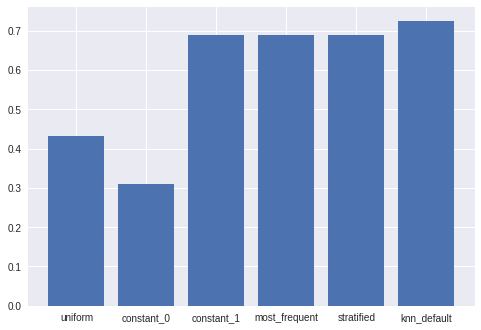

In [18]:
#%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(len(f1_micro)), list(f1_micro.values()), align='center')
plt.xticks(range(len(f1_micro)), list(f1_micro.keys()))
plt.show()

###f1_macro average

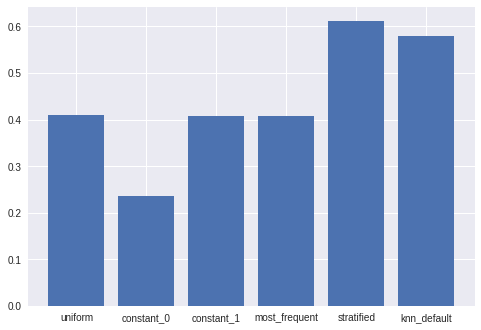

In [19]:
plt.bar(range(len(f1_macro)), list(f1_macro.values()), align='center')
plt.xticks(range(len(f1_macro)), list(f1_macro.keys()))
plt.show()

###Σχολιασμός
- Precision είναι ο λόγος των true positives (Tp) ως προς τον αριθμό των true positives συν τον αριθμό των false positives (Fp). 
- Recall είναι ο λόγος των true positives (Tp) ως προς τον αριθμό των true positives συν τον αριθμό των false negatives (Fn).

Γενικά όταν το Recall έχει υψηλή τιμή το μοντέλο μας προβλέπει καλά τη θετική κλάση (1) (όπως στον Dummy Constant 1) ενώ το Precision ίσως να μην έχει τόσο υψηλή τιμή. Ιδανικά θέλουμε υψηλό precision και υψηλό recall, αλλά μεταξύ των 2 υπάρχει συνήθως trade off. 

Βέβαια, για το συγκεκριμένο dataset θα θέλαμε να προβλέπουν τα μοντέλα μας πιο καλά το 0, δηλαδή τις κακές κολποσκοπήσεις (δε μας πειράζει να έχουμε και κάποια false negatives αρκεί να έχουμε όσο πιο λίγο false posotives). Κοιτώντας τους πίνακες σύγχυσης βλέπουμε πως τ κοντινότερο μοντέλο σε αυτό που ζητάμε θα ήταν το Dummy Constant 0 (λογικό, αφού αυτό προβλέπει συνέχεια την κλάση 0, άρα δε γίνεται να έχουμε false positives).

- Το F1 score είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης. Στην πράξη χρησιμοποιείται περισσότερο από τα άλλα δύο, καθώς επιτρέπει στα μοντέλα μας να έχουν τόσο καλό precision όσο και καλό recall. 
- Το F1 macro average παίρνει απλά το μέσο όρο των precision, recall
- To F1 micro average υπολογίζει ξεχωριστά τη συμβολή που έχει η κάθε κλάση στο σύνολο και με βάση αυτή θα βγάλει το μέσο.
- Από τα παραπάνω διαγράμματα παρατηρούμε ότι ο Constant 1 (και αντίστοιχα ο Most Frequent) δίνει το καλύτερο F1 micro average (λογικό, αφού τα περισσότερα δείγματά μας είναι θετικά και αυτό προβλέπει συνέχεια το 1) ενώ το καλύτερο F1 macro average δίνει ο KNeighbors Classifier.

#Δ. Βελτιστοποίηση ταξινομητών

Για τον KNeighbors Classifier θα προσπαθήσουμε να βρούμε τη βέλτιστη αρχιτεκτονική. Για το λόγο αυτό θα χρειαστεί να κάνουμε την κατάλληλη προεπεξεργασία στα δεδομένα μας.

Αρχικά θα κάνουμε επιλογή χαρακτηριστικών στο train set με βάση τη διακύμανση των τιμών τους. Στη συνέχεια θα κανονικοποιήσουμε και θα εξισορροπήσουμε τα δεδομένα έτσι ώστε να έχουμε ίσο αριθμό δειγμάτων για κάθε κλάση. Το επόμενο βήμα είναι να κάνουμε εξαγωγή νέων χαρακτηριστικών με ανάλυση σε κύριες συνιστώσες. Τέλος θα δοκιμάσουμε τον ταξινομητή μας για τα διάφορα k.

##Variance Threshold

Αρχικά θα κοιτάξουμε να βρούμε τη μέγιστη και ελάχιστη απόκλιση των χαρακτηριστικών του train set. 

In [20]:
variance = np.var(train, axis=0)

maxx = max(variance)
print("Max variance is ", maxx)

minn  = min(variance)
print("Min variance is ", minn)

threshold = [0, 2, 20, 200, 2000] #προσαρμόζουμε τις τιμές του thresold στο variance που παρατηρήσαμε

#Τα παρπακάτω μας χρειάζονται για να προσδιορίσουμε το threshold του selector στην περίπτωση που χρησιμοποιήσουμε min-max scaler για το grid search

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
variance = np.var(train_scaled, axis=0)

maxx = max(variance)
print("Max scaled variance is ", maxx)

minn  = min(variance)
print("Min scaled variance is ", minn)


Max variance is  8002.180994195962
Min variance is  3.728774474362219e-05
Max scaled variance is  0.08664143169172439
Min scaled variance is  0.007329603548654596


##Grid Search
Αφού βρήκαμε το variance είμαστε έτοιμοι να κάνουμε το grid search.

Θα χρησιμοποιήσουμε την KFold για να διαχωρίσουμε το train set σε 10 folds για να κάνουμε cross validation. Στο cross validation, για κάθε στάδιο προεπεξεργασίας αλλά και στο στάδιο ταξινόμησης, κάνουμε fit και transform στα folds που προορίζονται για train και απλά transform (ή αντίστοιχα predict για τον ταξινομητή) στο fold που προορίζεται για test.

Θα ξεκινήσουμε με τον VarianceThreshold και σε κάθε βήμα θα προσθέτουμε ένα ακόμα στάδιο προεπεξεργασίας (με τη σειρά που αναφέρθηκαν παραπάνω) μέχρι να βρούμε τη βέλτιστη αρχιτεκτονική. Εξαίρεση αποτελεί ο Min-max scaler για τον οποίο πρέπει να κάνουμε κανονικοποίηση πρωτού κάνουμε επιλογή δεδομένων με τον VarianceThreshold.

Για ευκολία, θα παρουσιάσουμε τον κώδικα μία φορά για όλα τα στάδια προεπεξεργασίας και τα αποτελέσματα για το κάθε βήμα θα παρουσιαστούν ξεχωριστά σε Markdown.

In [0]:

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει transform() kai όχι ως scale()
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from statistics import mean

neighbors = [1, 5, 11, 21, 31, 41, 51]
n_components = [3, 5, 7, 10, 12]

thr=0
ncomp=0
k=0
sc=0
kf=KFold(n_splits=10)

for n in neighbors:
  for comps in n_components:
    for var in threshold:
      scores = []
      for train_index, test_index in kf.split(train):
        selector = VarianceThreshold(var)
        train_reduced = selector.fit_transform(train[train_index])
        test_reduced = selector.transform(train[test_index])
        
        scaler = StandardScaler()
        train_scaled = scaler.fit_transform(train_reduced)
        test_scaled = scaler.transform(test_reduced)
        
        sampler = RandomUnderSampler()
        train_resampled, train_labels_resampled = sampler.fit_sample(train_scaled, train_labels[train_index])
        
        pca = PCA(n_components=comps)
        train_PCA = pca.fit_transform(train_resampled)
        test_PCA = pca.transform(test_scaled)
        
        knn = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
        knn.fit(train_PCA, train_labels_resampled)
        preds = knn.predict(test_PCA)
        
        scores.append(f1_score(train_labels[test_index], preds, average='micro'))
      scor=mean(scores)
      if scor > sc:
        sc=scor
        thr = var
        ncomp = comps
        k = n
       

              

In [22]:
print("Best f1_micro score is ", sc)
print("Optimized params are: threshold = {}, n_components = {}, kneighbours = {}".format(thr, ncomp, k))
          

Best f1_micro score is  0.7644268774703558
Optimized params are: threshold = 0, n_components = 12, kneighbours = 51


[0.33485142 0.52794864 0.71093117 0.79514256 0.83866024 0.8724394
 0.89832953 0.9199267  0.93668753 0.94816262 0.95840453 0.96693781]


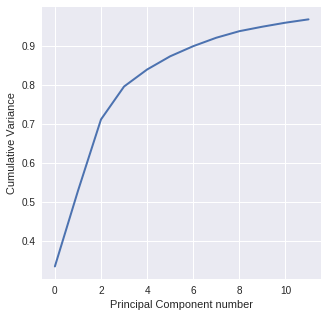

In [23]:
evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

##f1_micro average

###Στάδια:
1. KNeighbors Classifier

###Επίδοση, βέλτιστη παράμετρος:
Best f1_micro score is  0.7994071146245059

Optimized params are: kneighbours = 11

---
###Στάδια: 
1.  Variance Threshold
2. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.7994071146245059

Optimized params are: threshold = 0, kneighbours = 11

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  **0.808102766798419**

Optimized params are: threshold = 2000, kneighbours = 11


---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.7559288537549407

Optimized params are: threshold = 0, kneighbours = 1

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
4. PCA
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.7867588932806324
Optimized params are: threshold = 200, n_components = 3, kneighbours = 1

Αξίζει εδώ να παρατηρήσουμε πως με 3 μόλις components εξηγούμε σχεδόν το 77% της πληροφορίας του dataset (όπως φαίνεται παραπάνω).

---
---
###Θα κάνουμε τώρα Undersampling αντί για Oversampling

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random **Under**sampler
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.7776679841897233

Optimized params are: threshold = 0, kneighbours = 21

---
###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random **Under**sampler
4. PCA
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.7814229249011857

Optimized params are: threshold = 2000, n_components =  7, kneighbours = 21

---
---
###Θα χρησιμοποιήσουμε τώρα Min-max Scaler αντί για Standard Scaler

###Στάδια:
1. MinMax Scaler
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.7994071146245059

Optimized params are: threshold = 0, kneighbours = 11

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.7994071146245059

Optimized params are: threshold = 0.05, kneighbours = 5

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random Oversampler
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.7733201581027668

Optimized params are: threshold = 0.01, kneighbours = 1

###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random Oversampler
4. PCA
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.7822134387351778

Optimized params are: threshold = 0.0001, n_components = 7, kneighbours = 1

---
---
###Δοκιμάζουμε και UnderSampling αντί για OverSampling
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random **Under**sampler
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.7600790513833992

Optimized params are: threshold = 0.001, kneighbours = 51

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random **Under**sampler
4. PCA
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_micro score is  0.7646245059288537

Optimized params are: threshold = 0.0001, n_components = 12, kneighbours = 11

##Βέλτιστη Αρχιτεκτονική

Συγκρίνοντας τους παραπάνω συνδυασμούς παρατηρούμε πως η βέλτιστη αρχιτεκτονική για τη μετρική **f1 micro average** φαίνεται να είναι:
1. VarianceThreshold(var = 2000)
2. StandardScaler()
3. KNeighbors Classifier(n_neighbors = 11)

η οποία δίνει score  0.808102766798419

Για τη συγκεκριμένη αρχιτεκτονική θα εκτελέσουμε ένα στενότερο Grid Search (για να διαπιστώσουμε αν μπορεί να βελτιστοποιηθεί κι άλλο).

In [0]:
neighbors = [7, 9, 11, 13, 15]
threshold = [1000, 1500, 2000, 2500,3000]
k=0
thr=0
sc=0
kf=KFold(n_splits=10)

for n in neighbors:
    for var in threshold:
      scores = []
      for train_index, test_index in kf.split(train):
        selector = VarianceThreshold(var)
        train_reduced = selector.fit_transform(train[train_index])
        test_reduced = selector.transform(train[test_index])
        
        scaler = StandardScaler()
        train_scaled = scaler.fit_transform(train_reduced)
        test_scaled = scaler.transform(test_reduced)
        
        knn = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
        knn.fit(train_scaled, train_labels[train_index])
        preds = knn.predict(test_scaled)
        scores.append(f1_score(train_labels[test_index], preds, average='micro'))
        
      scor=mean(scores)
      #print(scor)
      if scor > sc:
        sc=scor
        k = n
        thr = var

In [25]:
print("Best f1_micro score is ", sc)
print("Optimized params are: threshold = {}, kneighbours = {}".format(thr, k))

optimum_thr = thr
optimum_k = k

Best f1_micro score is  0.799209486166008
Optimized params are: threshold = 2500, kneighbours = 13


Θα εφαρμόσουμε αυτό το μοντέλο για να κάνουμε fit σε όλο το training data και predict στο test data, τόσο για τον KNeighbors Classifier όσο και για τους Dummy Classifiers.

In [27]:
import time
start_time = time.time()

selector = VarianceThreshold(optimum_thr)
train_reduced = selector.fit_transform(train)
test_reduced = selector.transform(test)
        
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_reduced)
test_scaled = scaler.transform(test_reduced)

knn = KNeighborsClassifier(n_neighbors=optimum_k, n_jobs=-1)

knn.fit(train_scaled, train_labels)
preds = knn.predict(test_scaled)
print(print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time)))

print(confusion_matrix(test_labels, preds))
print(classification_report(test_labels, preds))
f1_micro_opt = {}
f1_micro_opt['knn_optimized'] = f1_score(test_labels, preds, average = 'micro')
diff = {}
diff["knn"] = f1_micro_opt['knn_optimized'] - f1_micro['knn_default']


Συνολικός χρόνος fit και predict: 0.11300992965698242 seconds
None
[[ 3 15]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        18
           1       0.73      1.00      0.84        40

   micro avg       0.74      0.74      0.74        58
   macro avg       0.86      0.58      0.56        58
weighted avg       0.81      0.74      0.67        58



In [0]:
model = uniform.fit(train_scaled, train_labels)
model = constant_0.fit(train_scaled, train_labels)
model = constant_1.fit(train_scaled, train_labels)
model = most_frequent.fit(train_scaled, train_labels)
model = stratified.fit(train_scaled, train_labels)

#Uniform
preds = uniform.predict(test_scaled)
f1_micro_opt['uniform'] = f1_score(test_labels, preds, average = 'micro')
diff['uniform'] = f1_micro_opt['uniform'] - f1_micro['uniform']
#Constant 0
preds = constant_0.predict(test)
f1_micro_opt['constant_0'] = f1_score(test_labels, preds, average = 'micro')
diff['constant_0'] = f1_micro_opt['constant_0'] - f1_micro['constant_0']

#Constant 1
preds = constant_1.predict(test)
f1_micro_opt['constant_1'] = f1_score(test_labels, preds, average = 'micro')
diff['constant_1'] = f1_micro_opt['constant_1'] - f1_micro['constant_1']

#Most Frequent
preds = most_frequent.predict(test)
f1_micro_opt['most_frequent'] = f1_score(test_labels, preds, average = 'micro')
diff['most_frequent'] = f1_micro_opt['most_frequent'] - f1_micro['most_frequent']

#Stratified
preds = stratified.predict(test)
f1_micro_opt['stratified'] = f1_score(test_labels, preds, average = 'micro')
diff['stratified'] = f1_micro_opt['stratified'] - f1_micro['stratified']

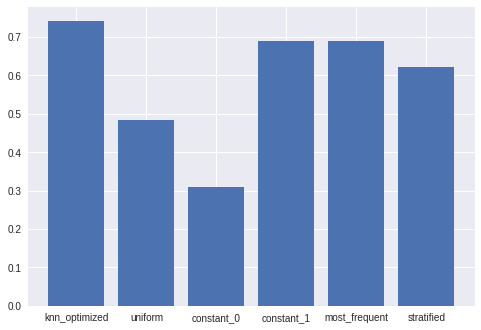

In [30]:
plt.bar(range(len(f1_micro_opt)), list(f1_micro_opt.values()), align='center')
plt.xticks(range(len(f1_micro_opt)), list(f1_micro_opt.keys()))
plt.show()

In [32]:
print("Μεταβολές στην επίδοση των ταξινομητών:\n")
for header in diff:
  print(header, diff[header])

Μεταβολές στην επίδοση των ταξινομητών:

knn 0.01724137931034475
uniform 0.05172413793103453
constant_0 0.0
constant_1 0.0
most_frequent 0.0
stratified -0.06896551724137934


Βλέπουμε λοιπόν πως η επίδοση του KNEighbors Classifier δεν έχει αυξηθεί πολύ, αλλά σύμφωνα με τη μεθοδολογία ήταν το καλύτερο που θα μπορούσαμε να κάνουμε.

Όσον αφορά τους Dummy Classifiers, ούτε εδώ είχαμε μεγάλες μεταβολές, αλλά αυτό ήταν αναμενόμενο καθώς αυτοί **επιλέγουν τυχαία** οπότε η οποιαδήποτε μεταβολή οφείλεται στην τύχη. Για το λόγο αυτό, για τη μετρική f1 macro average **δε θα τους ξανακάνουμε fit**, αφού στην ουσία δεν έχει καμία διαφορά.

##f1_macro average

In [35]:
neighbors = [1, 5, 11, 21, 31, 41, 51]
n_components = [3, 5, 7, 10, 12]
threshold = [0, 0.0001, 0.001, 0.01, 0.05]

thr=0
ncomp=0
k=0
sc=0
kf=KFold(n_splits=10)

for n in neighbors:
  for comps in n_components:
    for var in threshold:
      scores = []
      for train_index, test_index in kf.split(train):
        scaler = MinMaxScaler()
        train_scaled = scaler.fit_transform(train[train_index])
        test_scaled = scaler.transform(train[test_index])
        
        selector = VarianceThreshold(var)
        train_reduced = selector.fit_transform(train_scaled)
        test_reduced = selector.transform(test_scaled)
        
        sampler = RandomUnderSampler()
        train_resampled, train_labels_resampled = sampler.fit_sample(train_reduced, train_labels[train_index])
        
        pca = PCA(n_components=comps)
        train_PCA = pca.fit_transform(train_resampled)
        test_PCA = pca.transform(test_reduced)
        
        knn = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
        knn.fit(train_resampled, train_labels_resampled)
        preds = knn.predict(test_reduced)
        scores.append(f1_score(train_labels[test_index], preds, average='macro'))
      scor=mean(scores)
      if scor > sc:
        sc=scor
        thr = var
        ncomp = comps
        k = n

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:114

In [36]:
print("Best f1_macro score is ", sc)
print("Optimized params are: threshold = {}, n_components = {}, kneighbours = {}".format(thr, ncomp, k))
     

Best f1_macro score is  0.6428407097856813
Optimized params are: threshold = 0.001, n_components = 3, kneighbours = 1


###Στάδια:
1. KNeighbors Classifier

###Επίδοση, βέλτιστη παράμετρος:
Best f1_macro score is  0.624005102294576

Optimized params are: kneighbours = 1

---
###Στάδια: 
1.  Variance Threshold
2. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.6417698613618917

Optimized params are: threshold = 2000, kneighbours = 1

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.6286971479567828

Optimized params are: threshold = 0, kneighbours = 1


---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.6286971479567828

Optimized params are: threshold = 0, kneighbours = 1

---

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
4. PCA
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  **0.6910510996085353**

Optimized params are: threshold = 200, n_components = 3, kneighbours = 1

---
---
###Θα κάνουμε τώρα Undersampling αντί για Oversampling

###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random **Under**sampler
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.6461775497301813

Optimized params are: threshold = 2000, kneighbours = 41

---
###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random **Under**sampler
4. PCA
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.6452531447115987

Optimized params are: threshold = 2000, n_components = 12, kneighbours = 21

---
---
###Θα χρησιμοποιήσουμε τώρα Min-max Scaler αντί για Standard Scaler

###Στάδια:
1. MinMax Scaler
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.6411519601457681

Optimized params are: kneighbours = 1

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.6515759367539553

Optimized params are: threshold = 0.01, kneighbours = 1

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random Oversampler
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.6515759367539553

Optimized params are: threshold = 0.01, kneighbours = 1

###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random Oversampler
4. PCA
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.6757562347287579

Optimized params are: threshold = 0.0001, n_components = 10, kneighbours = 5

---
---
###Δοκιμάζουμε και UnderSampling αντί για OverSampling
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random **Under**sampler
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
est f1_macro score is  0.644687516204544

Optimized params are: threshold = 0, kneighbours = 21

---
###Στάδια:
1. MinMax Scaler
2. Variance Threshold
3. Random **Under**sampler
4. PCA
2. KNeighbors Classifier

###Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  0.6337815585323331

Optimized params are: threshold = 0.0001, n_components = 5, kneighbours = 1

##Βέλτιστη Αρχιτεκτονική
###Στάδια: 
1.  Variance Threshold
2. Standard Scaler
3. Random Oversampler
4. PCA
3. KNeighbors Classifier

### Επίδοση, βέλτιστες υπερπαράμετροι:
Best f1_macro score is  **0.6910510996085353**

Optimized params are: threshold = 200, n_components = 3, kneighbours = 1

In [0]:
#Progressive GridSearch
#Βελτιστοποιούμε ακόμα καλύτερα την αρχιτεκτονική

threshold = [100, 150, 200, 2500, 300]
n_components = [1,2,3,4]
neighbors = [1,3,5]

thr=0
ncomp=0
k=0
sc=0
kf=KFold(n_splits=10)

for n in neighbors:
  for comps in n_components:
    for var in threshold:
      scores = []
      for train_index, test_index in kf.split(train):
        selector = VarianceThreshold(var)
        train_reduced = selector.fit_transform(train[train_index])
        test_reduced = selector.transform(train[test_index])
        
        scaler = StandardScaler()
        train_scaled = scaler.fit_transform(train_reduced)
        test_scaled = scaler.transform(test_reduced)
        
        sampler = RandomOverSampler()
        train_resampled, train_labels_resampled = sampler.fit_sample(train_scaled, train_labels[train_index])
        
        pca = PCA(n_components=comps)
        train_PCA = pca.fit_transform(train_resampled)
        test_PCA = pca.transform(test_scaled)
        
        knn = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
        knn.fit(train_PCA, train_labels_resampled)
        preds = knn.predict(test_PCA)
        scores.append(f1_score(train_labels[test_index], preds, average='macro'))
      
      scor=mean(scores)
      if scor > sc:
        sc=scor
        thr = var
        ncomp = comps
        k = n

In [38]:
print("Best f1_micro score is ", sc)
print("Optimized params are: threshold = {}, n_components = {}, kneighbours = {}".format(thr, ncomp, k))

optimum_k = k
optimum_thr = thr
optimum_n = ncomp

Best f1_micro score is  0.6893038255448286
Optimized params are: threshold = 200, n_components = 4, kneighbours = 3


In [44]:
start_time = time.time()

selector = VarianceThreshold(optimum_thr)
train_reduced = selector.fit_transform(train)
test_reduced = selector.transform(test)
        
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_reduced)
test_scaled = scaler.transform(test_reduced)
        
sampler = RandomOverSampler()
train_resampled, train_labels_resampled = sampler.fit_sample(train_scaled, train_labels)
        
pca = PCA(n_components=optimum_n)
train_PCA = pca.fit_transform(train_resampled)
test_PCA = pca.transform(test_scaled)
        
knn = KNeighborsClassifier(n_neighbors= optimum_k, n_jobs=-1)
knn.fit(train_PCA, train_labels_resampled)
preds = knn.predict(test_PCA)

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(confusion_matrix(test_labels, preds))
print(classification_report(test_labels, preds))

f1_macro['knn_optimized'] = f1_score(test_labels, preds, average = 'macro')
print("\n Μεταβολή επίδοσης:", f1_macro['knn_optimized'] - f1_macro['knn_default'])

Συνολικός χρόνος fit και predict: 0.11875510215759277 seconds
[[11  7]
 [11 29]]
              precision    recall  f1-score   support

           0       0.50      0.61      0.55        18
           1       0.81      0.72      0.76        40

   micro avg       0.69      0.69      0.69        58
   macro avg       0.65      0.67      0.66        58
weighted avg       0.71      0.69      0.70        58


 Μεταβολή επίδοσης: 0.0768688024408849


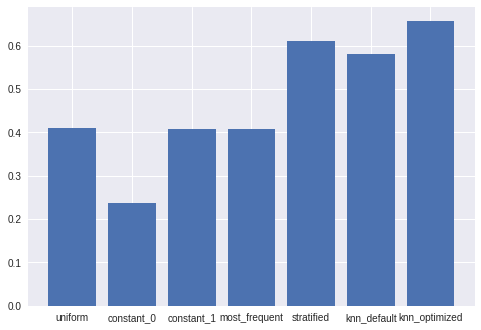

In [45]:
plt.bar(range(len(f1_macro)), list(f1_macro.values()), align='center')
plt.xticks(range(len(f1_macro)), list(f1_macro.keys()))
plt.show()

##Σχολιασμός
Όσον αφορά τους χρόνους εκτέλεσης αυτοί δεν είναι πολύ μεγάλοι αφού το dataset μας είναι μικρό.

Για τις μετρικές f1 micro και f1 marco βρήκαμε τη βέλτιστη αρχιτεκτονική σύμφωνα με τη μεθοδολογία και πράγματι οι επιδόσεις του κάθε μοντέλου αυξήθηκαν για τις μετρικές αυτές. 

Παρατηρούμε ότι για τον KNeighbors Classifier με τη βελτιστοποίηση της f1 micro βελτιστοποιήθηκαν και τα precision και recall (όπως ήταν αναμενόμενο). 

Για τη βέλτιστη μετρική f1 macro average το recall αυξήθηκε αλλά το precision μειώθηκε ελάχιστα.